The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Start coding here!

In [2]:
df = pd.read_csv('./data/nobel.csv')
cat_list = list(df['category'].unique())
cat_list


['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics', 'Economics']

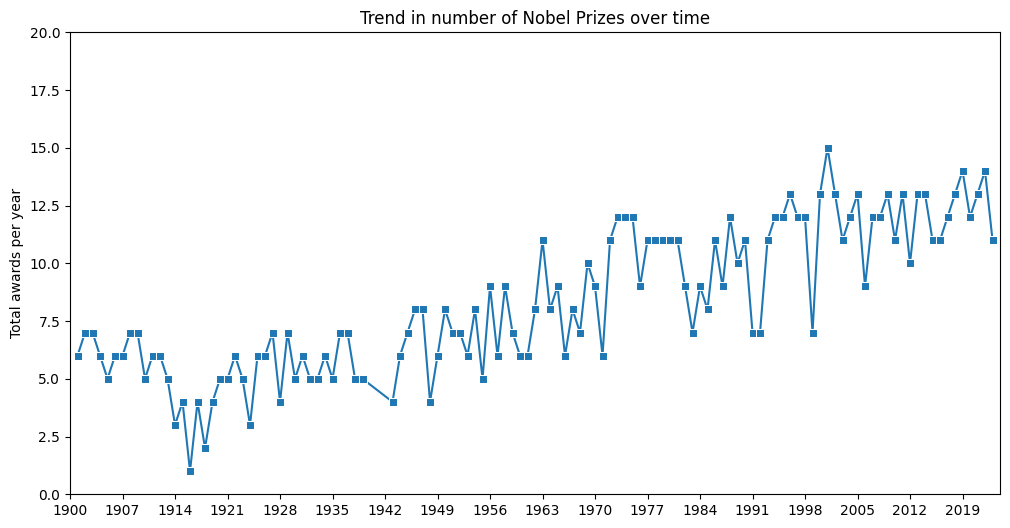

In [3]:
df_cat = df.groupby(['year', 'category'])['category'].count().unstack(fill_value=0)
df_cat['total'] = df_cat.sum(axis = 1)
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_cat, x = df_cat.index, y = 'total', marker = 's')
plt.xlim([1900, 2024])
plt.ylim([0, 20])
plt.xticks(range(1900,2024, 7))
plt.xlabel('')
plt.ylabel('Total awards per year')
plt.title('Trend in number of Nobel Prizes over time')
plt.show()

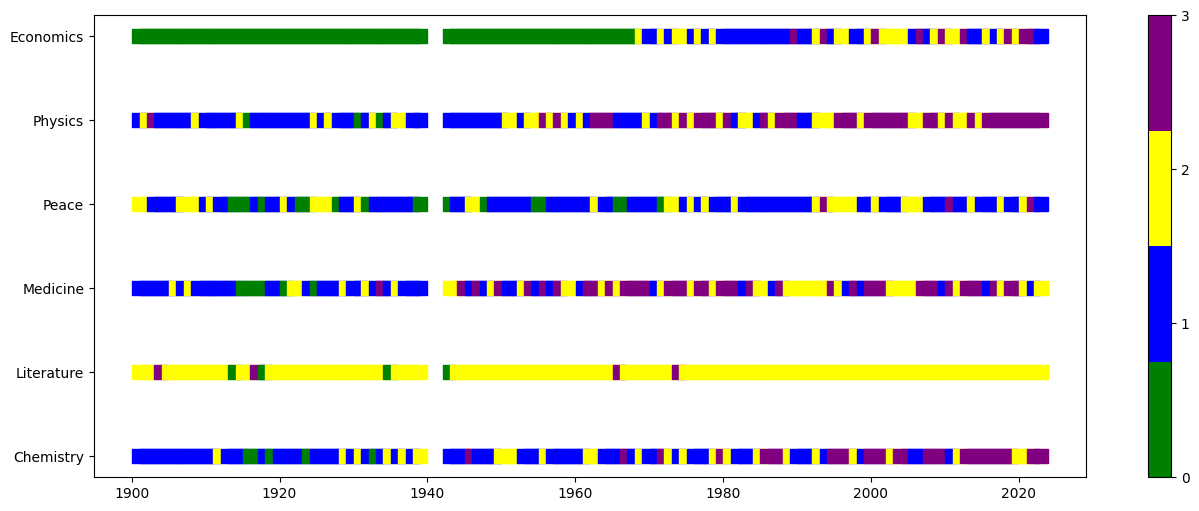

In [4]:
from matplotlib.colors import ListedColormap 


plt.figure(figsize = (16,6))
color_map = ListedColormap(['green', 'blue', 'yellow', 'purple'])

for idx, column in enumerate(cat_list):   
    plt.scatter(df_cat.index, [idx]*len(df_cat), c= df_cat[column], cmap =color_map, s=100, marker = "s")

plt.yticks(range(0,len(cat_list)), cat_list)
cbar = plt.colorbar(ticks = [0, 1, 2, 3])
plt.show()

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
url = "./data/ne_10m_admin_0_countries.shp"
world = gpd.read_file(url)
world = world[['geometry', 'NAME']].copy()
world['Country'] = world['NAME']

df_country = df.groupby('birth_country').size().reset_index()
df_country.columns = ['Country', "Number_of_Prizes"]
nobel_map = pd.merge(world, df_country, on = "Country", how='inner')


In [7]:
df_country.sort_values(by = 'Number_of_Prizes', ascending = False).head(10)

,Country,Number_of_Prizes
123,United States of America,291
122,United Kingdom,91
46,Germany,67
41,France,58
110,Sweden,30
63,Japan,28
26,Canada,21
111,Switzerland,19
75,Netherlands,19
95,Russia,18


C:\Users\User\AppData\Local\Temp\ipykernel_29952\1531173562.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(nobel_map.geometry.centroid.x, nobel_map.geometry.centroid.y, nobel_map['Number_of_Prizes']):


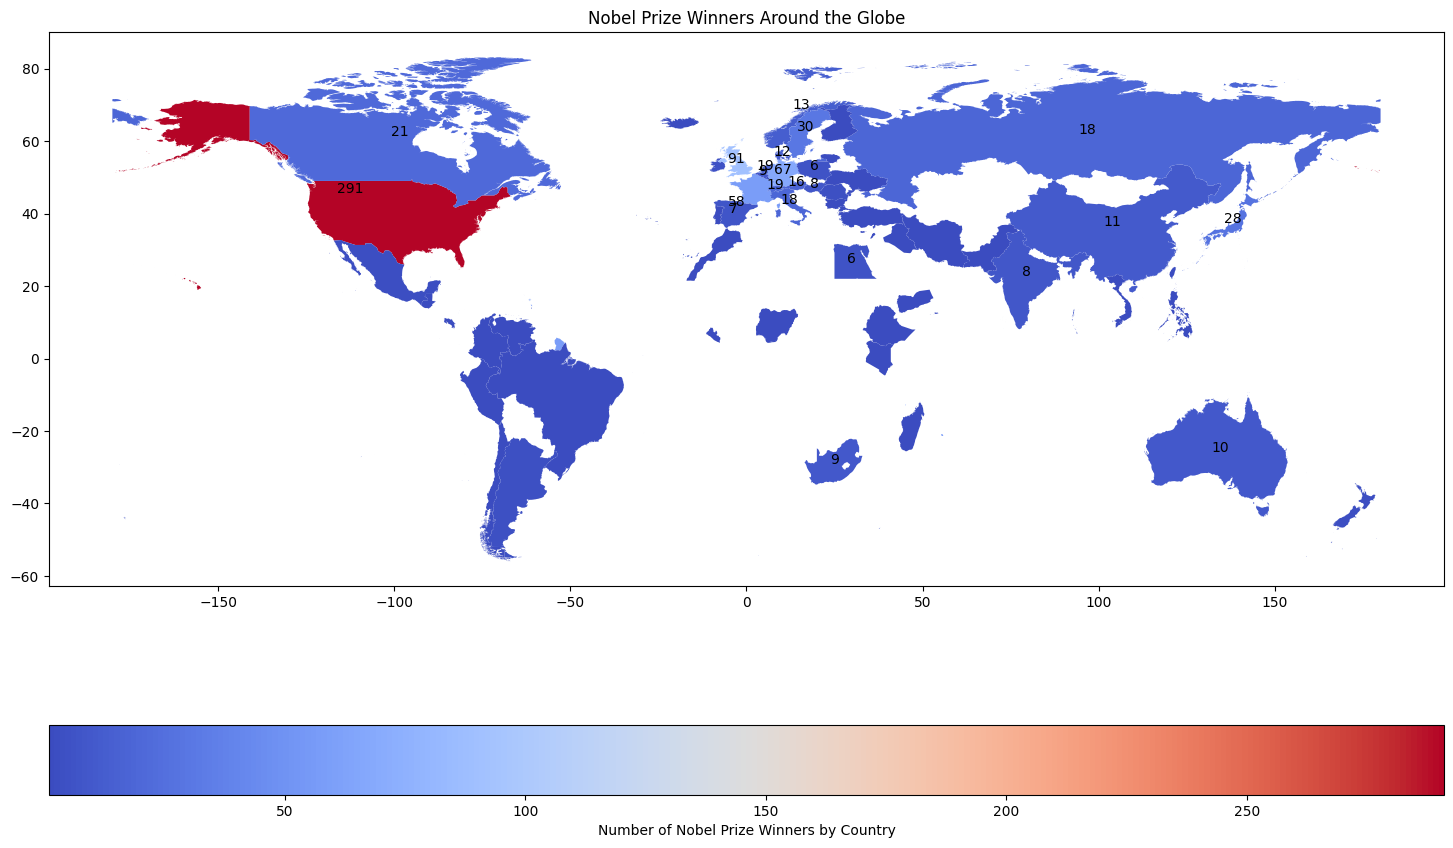

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(18, 12))
nobel_map.plot(column='Number_of_Prizes', ax=ax, legend=True, 
               legend_kwds={'label': "Number of Nobel Prize Winners by Country", 
                            'orientation': "horizontal"},
               cmap='coolwarm')
ax.set_title("Nobel Prize Winners Around the Globe")
for x, y, label in zip(nobel_map.geometry.centroid.x, nobel_map.geometry.centroid.y, nobel_map['Number_of_Prizes']):
    ax.text(x, y, str(int(label)) if label>5 else '', fontsize=10, ha='center', color='black')
plt.show()

##### What is the most commonly awarded gender and birth country?
***Store your answers as string variables top_gender and top_country.***
##### Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
***Store this as an integer called max_decade_usa.***
##### Which decade and Nobel Prize category combination had the highest proportion of female laureates?
***Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.***
##### Who was the first woman to receive a Nobel Prize, and in what category?
***Save your string answers as first_woman_name and first_woman_category.***
##### Which individuals or organizations have won more than one Nobel Prize throughout the years?
***Store the full names in a list named repeat_list.***


In [9]:
top_gender = df['sex'].mode().values[0]
top_country = df['birth_country'].mode().values[0]
top_country

'United States of America'

In [10]:
df_decade = df.copy()
df_decade['decade'] = (df['year']//10)*10
total_awards = df_decade.groupby('decade').size().reset_index()
total_awards.columns = ['decade', 'total_awards']
total_awards_country = df_decade.groupby(['decade', 'birth_country']).size().reset_index()
total_awards_country.columns = ['decade', 'birth_country', 'total_awards']
total_awards_country

merged_df = pd.merge(total_awards_country, total_awards, on = 'decade', how = 'inner')
merged_df.columns = ['decade', 'birth_country', 'total_awards_country', 'total_awards']
merged_df['percentage'] = merged_df['total_awards_country']/merged_df['total_awards']
us_df = merged_df[merged_df['birth_country'] == 'United States of America']
us_df = us_df.sort_values(by = 'percentage', ascending= False)
max_decade_usa = int(us_df['decade'].values[0])
max_decade_usa

2000

In [11]:
decade_category = df_decade.groupby(['decade', 'category']).size().reset_index()
decade_category.columns = ['decade', 'category', 'total_awards']
gender_category = df_decade.groupby(['decade', 'category', 'sex']).size().reset_index()
gender_category.columns = ['decade', 'category','gender', 'gender_awards']
merged_df = pd.merge(decade_category, gender_category, on = ['decade', 'category'], how = 'inner')
merged_df['percentage'] = merged_df['gender_awards']/merged_df['total_awards']
merged_df = merged_df[merged_df['gender'] == 'Female'].sort_values(by = 'gender_awards', ascending = False) 
max_female_dict = {int(merged_df.decade.values[0]): merged_df.category.values[0]}
max_female_dict

{2010: 'Peace'}

In [12]:
df_women = df[df['sex']=='Female'].sort_values(by = 'year', ascending = True)
first_woman_name  = df_women.iloc[0]['full_name']
first_woman_category = df_women.iloc[0]['category']
print(first_woman_name, first_woman_category)

Marie Curie, née Sklodowska Physics


In [13]:
repeat_list = list(df[df['full_name'].duplicated()]['full_name'].unique())
repeat_list

['Marie Curie, née Sklodowska',
 'Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']